In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline  

In [2]:
data = pd.read_csv('occupancy.txt')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


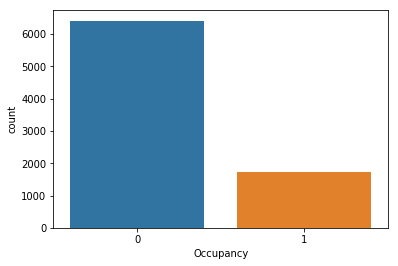

In [3]:
sns.countplot(x='Occupancy',data=data)  # very unblanced data

In [4]:
data['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [30]:
ratio = data[data.Occupancy==0].shape[0]/data[data.Occupancy==1].shape[0]  #calculate the imbalance ratio
ratio

3.709658762290341

### Origin data

In [5]:
X = data[['Temperature','Humidity']]
y = data['Occupancy']

In [6]:
X.shape,y.shape

((8143, 2), (8143,))

In [7]:
y.value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

### Over-sampling by SMOTE 

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)  # k_neighbors should be chosen by experience

In [10]:
X_res,y_res=smote.fit_resample(X,y)

In [11]:
X_res.shape,y_res.shape

((12828, 2), (12828,))

In [12]:
y_res.value_counts()

1    6414
0    6414
Name: Occupancy, dtype: int64

### Over-sampling by Random

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros = RandomOverSampler(random_state=2)

In [15]:
X_res2,y_res2=ros.fit_sample(X,y)

In [17]:
y_res2.value_counts()

1    6414
0    6414
Name: Occupancy, dtype: int64

### Under-sampling by Random

In [18]:
from imblearn.under_sampling import ClusterCentroids

In [19]:
cc = ClusterCentroids(random_state=3)

In [20]:
X_res3,y_res3=cc.fit_sample(X,y)

In [21]:
y_res3.value_counts()

1    1729
0    1729
Name: Occupancy, dtype: int64

+ See more Over/Under-sampling models from https://blog.csdn.net/qq_27802435/article/details/81201357
+ Only do Over/Under-sampling on training set!!!)

### Set weight to balance data

In [23]:
from sklearn.linear_model import LogisticRegression as LR

In [32]:
model = LR()
model2 = LR(class_weight={0: 1, 1: ratio})

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [35]:
# without weight setting
from sklearn.metrics import roc_auc_score
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.709310878823074

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1166   94]
 [ 187  182]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1260
           1       0.66      0.49      0.56       369

    accuracy                           0.83      1629
   macro avg       0.76      0.71      0.73      1629
weighted avg       0.82      0.83      0.82      1629



In [39]:
# with weight setting
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
auc2 = roc_auc_score(y_test, y_pred2)
auc2

0.8252516453735965

In [43]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1045  215]
 [  66  303]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1260
           1       0.58      0.82      0.68       369

    accuracy                           0.83      1629
   macro avg       0.76      0.83      0.78      1629
weighted avg       0.86      0.83      0.84      1629

